In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv('data/reed_uk_data_analyst_skills.csv')

In [2]:
print("Data shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

Data shape: (1528, 6)

First 5 rows:
                  job_title                                            job_url  \
0             Data Analyst  https://www.reed.co.uk/jobs/data-analyst/54606...   
1      Junior Data Analyst  https://www.reed.co.uk/jobs/junior-data-analys...   
2  Data Analyst Apprentice  https://www.reed.co.uk/jobs/data-analyst-appre...   
3   Principal Data Analyst  https://www.reed.co.uk/jobs/principal-data-ana...   
4  Data Analyst Apprentice  https://www.reed.co.uk/jobs/data-analyst-appre...   

                    location              job_type  \
0                     London  Permanent, full-time   
1           Chertsey, Surrey  Permanent, full-time   
2    Stafford, Staffordshire  Permanent, full-time   
3                     London  Permanent, full-time   
4  Trafford Park, Lancashire  Permanent, full-time   

                        salary                          skills  
0           Competitive salary  power bi, python, sql, tableau  
1           Competit

In [3]:
print("\nUnique job titles:\n", df['job_title'].value_counts())
print("\nUnique locations:\n", df['location'].value_counts())
print("\nUnique job types:\n", df['job_type'].value_counts())
print("\nUnique salary entries:\n", df['salary'].value_counts())

print("\nNumber of 'Not specified' entries:")
print(f"Salary: {len(df[df['salary'] == 'Not specified'])}")
print(f"Location: {len(df[df['location'] == 'Not specified'])}")
print(f"Job type: {len(df[df['job_type'] == 'Not specified'])}")


Unique job titles:
 job_title
Data Analyst                                   140
Trainee Software Developer                      99
Data Analyst Trainee                            97
Web Developer Trainee                           91
Data Science Trainee                            90
                                              ... 
Growth Analyst                                   1
Financial Planning Analyst                       1
CRM Analyst                                      1
Interim Finance Analyst                          1
Financial Planning &amp; Analysis Assistant      1
Name: count, Length: 605, dtype: int64

Unique locations:
 location
London                                460
Manchester, Lancashire                 58
Leeds, West Yorkshire                  39
Birmingham, West Midlands (County)     33
City of London, London                 24
                                     ... 
Middleton, Manchester, Lancashire       1
Tadworth, Surrey                        1
Chel

# Skills analysis

In [4]:
def split_skills(skills_text):
    return [skill.strip() for skill in str(skills_text).split(',')]

df['skills_list'] = df['skills'].apply(split_skills)
print(df[['skills', 'skills_list']].head())

                           skills                       skills_list
0  power bi, python, sql, tableau  [power bi, python, sql, tableau]
1                 excel, power bi                 [excel, power bi]
2            excel, power bi, sql            [excel, power bi, sql]
3            python, sql, tableau            [python, sql, tableau]
4                 excel, power bi                 [excel, power bi]


In [5]:
# Count occurrences of each skill
all_skills = []
for skills in df['skills_list']:
    all_skills.extend(skills)

skill_counts = Counter(all_skills)

skills_freq_df = pd.DataFrame(skill_counts.most_common(), columns=['Skill', 'Frequency'])
print(skills_freq_df)

         Skill  Frequency
0       python        818
1          sql        776
2        excel        683
3      tableau        417
4     power bi        386
5   javascript        298
6            r         75
7      powerbi         54
8          sas         46
9         java         22
10       spark         17
11      matlab         10
12         cpp          8
13        qlik          6
14       swift          5
15       scala          5


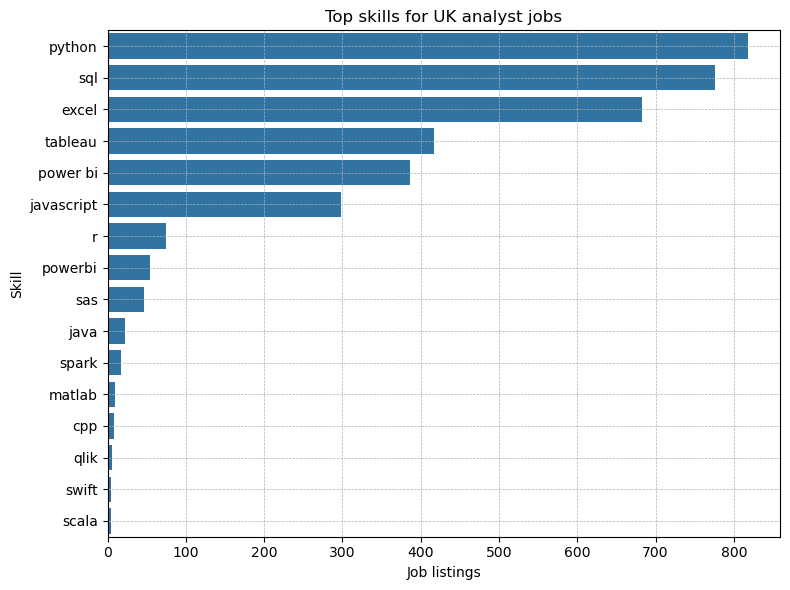

In [6]:
plt.figure(figsize=(8, 6))
sns.barplot(data=skills_freq_df, x='Frequency', y='Skill')
plt.title('Top skills for UK analyst jobs')
plt.xlabel('Job listings')
plt.ylabel('Skill')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='both')
plt.tight_layout()
plt.show()

# Job type analysis

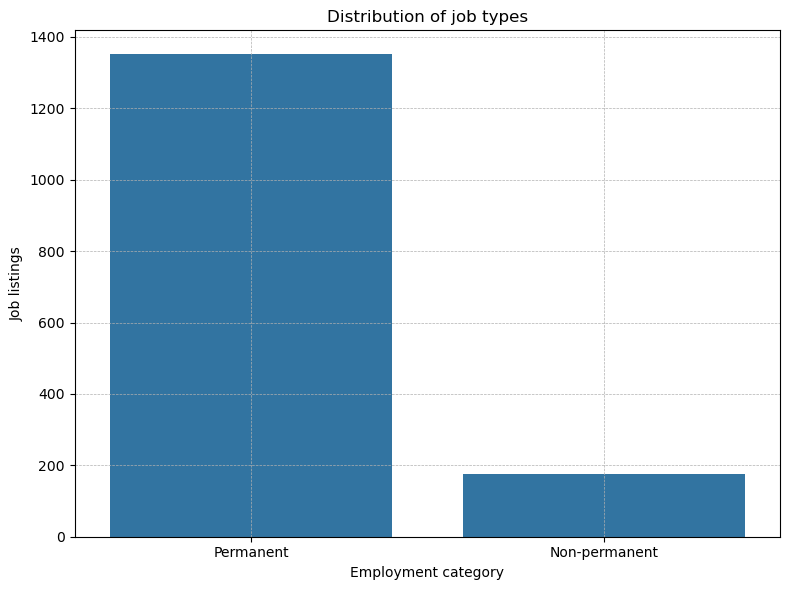

In [7]:
# Permanent vs non permanent (contract/temporary)
df['employment_category'] = df['job_type'].apply(lambda x: 'Non-permanent' if ('Contract' in x or 'Temporary' in x) else 'Permanent')

plt.figure(figsize=(8, 6))
sns.barplot(data=df['employment_category'].value_counts())
plt.title('Distribution of job types')
plt.xlabel('Employment category')
plt.ylabel('Job listings')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='both')
plt.tight_layout()
plt.show()

# Location analysis

In [8]:
# Handles variants of London to just London
is_london = df['location'].str.contains('London', case=False, na=False)
df.loc[is_london, 'location_clean'] = 'London'

# Takes the first part of the location string (main city)
# "Stoke-on-Trent, Staffordshire" become "Stoke-on-Trent"
df.loc[~is_london, 'location_clean'] = df.loc[~is_london, 'location'].str.split(',', n=1).str[0].str.strip()

# Handles variants of business park and industrial park to just the city
park_estate_pattern = r'\s*(Business Park|Industrial Park)$'
df['location_clean'] = df['location_clean'].str.replace(park_estate_pattern, '', regex=True, case=False).str.strip()

# Handles variants of England to just England
is_england_region = df['location_clean'].str.contains('England', case=False, na=False)
df.loc[is_england_region, 'location_clean'] = 'England (region)'



# pd.set_option('display.max_rows', None) 
# pd.set_option('display.max_columns', None) 

# print("\nCleaned locations:\n", df['location_clean'].value_counts())

# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

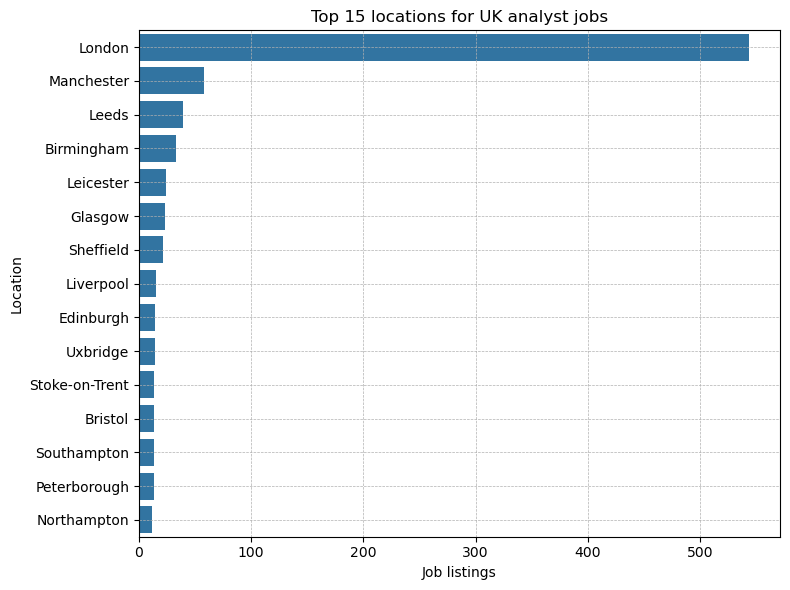

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(y=df['location_clean'].value_counts().head(15).index, x=df['location_clean'].value_counts().head(15).values)
plt.title('Top 15 locations for UK analyst jobs')
plt.ylabel('Location')
plt.xlabel('Job listings')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='both')
plt.tight_layout()
plt.show()


# Salary analysis
skills for job with top salary  
what does competitve and salary negotiable mean?  
outlier of 380000 pounds

In [10]:
# Clean salary by removing the extra text such as inc benefits...
df['salary_clean'] = df['salary'].str.extract(r'(.*?(?:per annum|per day|per hour|Competitive salary|Not specified|Salary negotiable|Salary not specified))')


# salary_type column with "per annum specified" or "others" (per annum for analysis, only british pound is used)
df['salary_type'] = np.where((df['salary_clean'].str.contains('per annum', case=False)) & (df['salary_clean'].str.contains('£')), 'per annum specified', 'others')


# Extract all numbers from salary strings
numbers = df['salary_clean'].str.extractall(r'£?([\d,]+(?:\.\d+)?)')[0].str.replace(',', '').astype(float)

grouped_numbers = numbers.groupby(level=0).agg(list)

# per annum averages
# if single number use that, if two numbers take mean
df['annum_avg'] = grouped_numbers.apply(lambda x: x[0] if len(x) == 1 else sum(x)/2 if len(x) == 2 else None)

# annum_avg only for per annum specified, others are NaNs
df['annum_avg'] = df['annum_avg'].where(df['salary_type'] == 'per annum specified')

# pd.set_option('display.max_rows', None) 
# pd.set_option('display.max_columns', None) 

# print(df['salary_clean'].value_counts())
# print(df['salary_type'].value_counts())
# print(df['annum_avg'].value_counts().sort_index(ascending=False))

# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

valid_annual_salaries = df['annum_avg'].dropna()

print("Summary statistics for per annum")
print(valid_annual_salaries.describe())
print("\nMedian per annum salary:", valid_annual_salaries.median())

Summary statistics for per annum
count      1093.000000
mean      44219.675252
std       19861.637757
min       18000.000000
25%       30500.000000
50%       40000.000000
75%       52500.000000
max      380000.000000
Name: annum_avg, dtype: float64

Median per annum salary: 40000.0


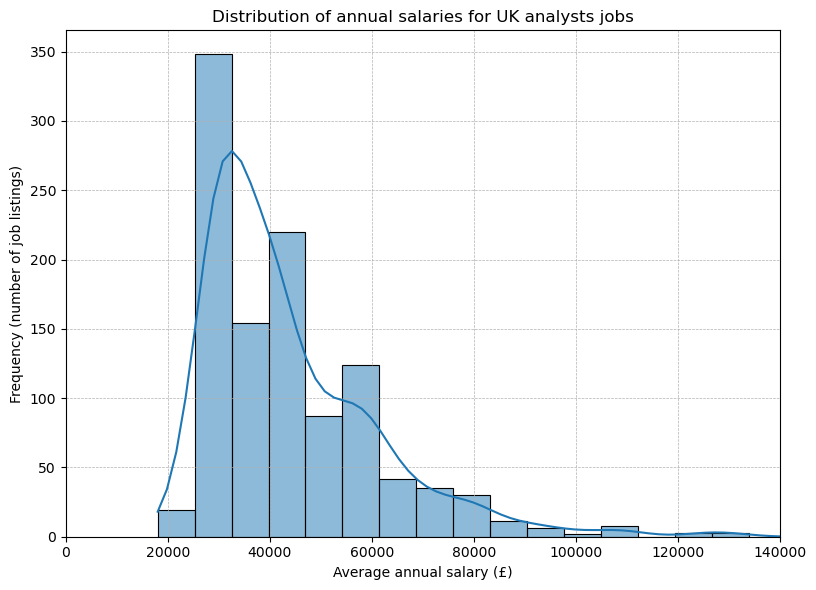

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(valid_annual_salaries, bins=50, kde=True)
plt.title('Distribution of annual salaries for UK analysts jobs')
plt.xlabel('Average annual salary (£)')
plt.ylabel('Frequency (number of job listings)')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='both')
plt.tight_layout()
plt.xlim(0, 140000)
plt.show()